`Team 16
Thuật toán LinearRegression về dự đoán giá Vàng, Bạch Kim, Bạc`

In [1]:
#1. Cài đặt thư viện
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.style.use("ggplot")
import numpy as np 
import pandas as pd 
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
#2. Đọc file dữ liệu và xem dữ liệu
df = pd.read_csv('../PlatiumData.csv',parse_dates=True)
df

,Ngày,Lần cuối,Mở,Cao,Thấp,KL
0,20/5/2018,886.2,886.8,889.0,885.5,NaN
1,21/5/2018,899.5,886.2,902.7,877.8,NaN
2,22/5/2018,908.3,899.5,912.0,896.3,NaN
3,23/5/2018,904.6,908.3,910.4,898.5,NaN
4,24/5/2018,910.4,904.6,914.7,903.5,NaN
...,...,...,...,...,...,...
1553,15/5/2023,1082.8,1057.6,1079.1,1057.5,NaN
1554,16/5/2023,1075.0,1070.5,1078.7,1061.8,NaN
1555,17/5/2023,1090.7,1067.7,1086.1,1067.4,NaN
1556,18/5/2023,1066.3,1079.2,1080.8,1055.0,NaN


In [3]:
#3. Xem các dữ liệu cơ bản của cảc thuộc tính
df.describe()

,Lần cuối,Mở,Cao,Thấp
count,1558.000000,1558.000000,1558.000000,1558.000000
mean,944.065918,943.859884,955.499743,932.064955
std,116.994315,116.800419,119.007199,115.160228
min,595.200000,596.050000,615.400000,562.000000
25%,852.987500,852.887500,862.150000,844.275000
50%,930.875000,931.225000,941.900000,920.700000
75%,1018.200000,1017.575000,1029.475000,1003.175000
max,1318.750000,1292.800000,1351.200000,1283.150000


In [4]:
#4. Kiểm tra dữ liệu rỗng
df.isnull().sum()

Ngày          0
Lần cuối      0
Mở            0
Cao           0
Thấp          0
KL          978
dtype: int64

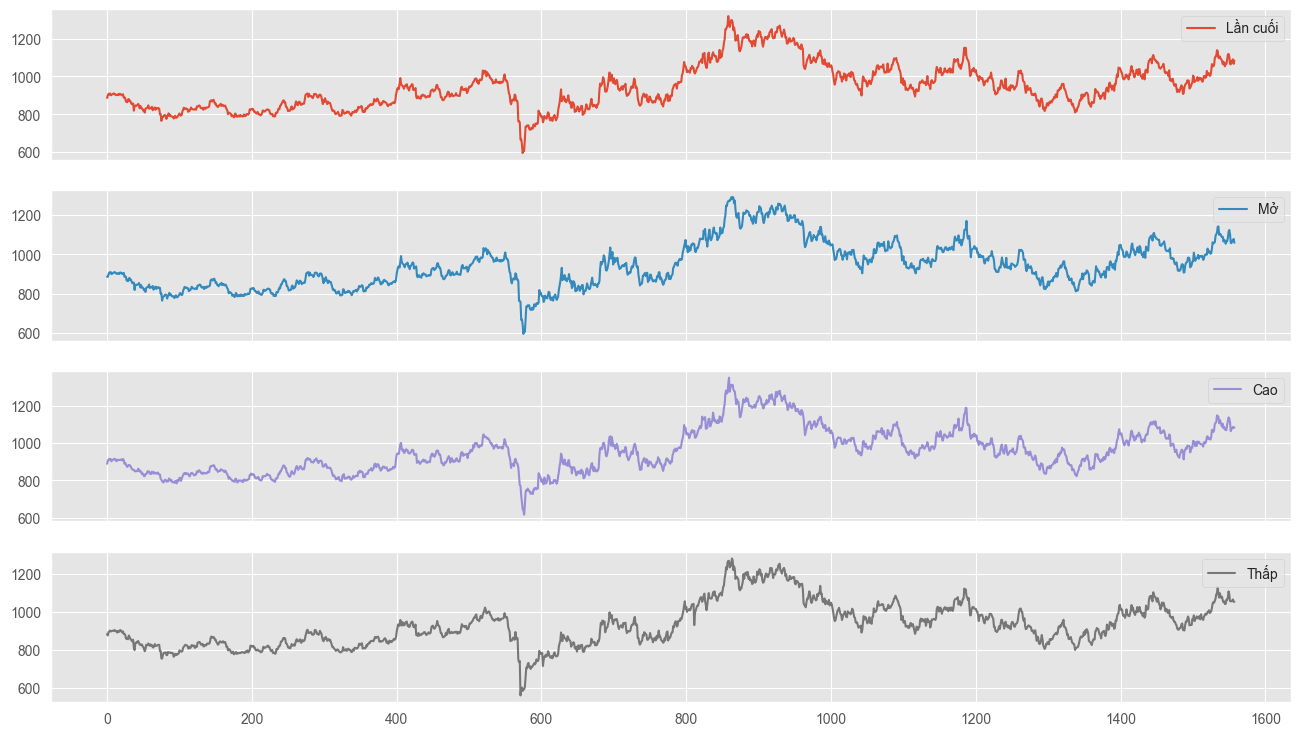

In [5]:
#5. Xem độ biến thiên của từng thuộc tính.
df.plot(legend=True,subplots=True, figsize = (16, 9))
plt.show()

In [6]:
#6. Chuyển dataset về cột Close để tiến hành tạo model
df = df[['Lần cuối']]
df

,Lần cuối
0,886.2
1,899.5
2,908.3
3,904.6
4,910.4
...,...
1553,1082.8
1554,1075.0
1555,1090.7
1556,1066.3


In [7]:
#7. Chia dữ liệu theo các tỷ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data_df = df[:train_size]
test_data_df = df[train_size:train_size+test_size]
val_data_df = df[train_size+test_size:]


In [8]:
#8. Đánh giá 
def deviation(test, pred):
  rmse= np.sqrt(mean_squared_error(test,pred))
  print(f"RMSE: {rmse:.2f}")
  mape= mean_absolute_percentage_error(test,pred)
  print(f"MAPE: {mape*100:.2f}%")
  mae = mean_absolute_error(test, pred)
  print(f"MAE: {mae:.2f}")

In [9]:
#9. the linear regression model
model = LinearRegression()
#Hàm visualize
def visualize(label ,pred, model_name):
  plt.figure(figsize=(12,8))
  plt.plot(label, label = 'Ground truth')
  plt.plot(label.index, pred, label='Predict')
  plt.title(model_name)
  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.legend()
  plt.show()

In [10]:
# 10. Quá trình Training
x_train = np.array(train_data_df.index).reshape(-1, 1)
y_train = np.array(train_data_df)
model.fit(x_train, y_train)


LinearRegression()

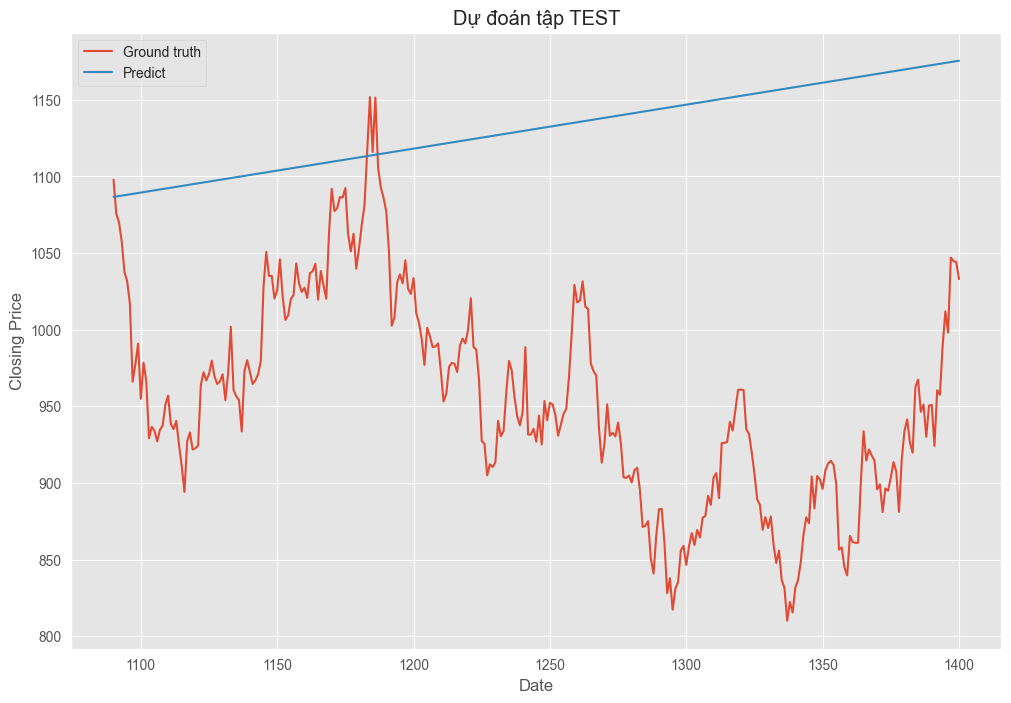

RMSE: 196.64
MAPE: 19.35%
MAE: 177.88


In [11]:
# 11. Quá trình testing 
x_test = np.array(test_data_df.index).reshape(-1, 1)
y_test = np.array(test_data_df)
test_predict = model.predict(x_test)
visualize(test_data_df, test_predict, 'Dự đoán tập TEST')
deviation(test_data_df, test_predict)

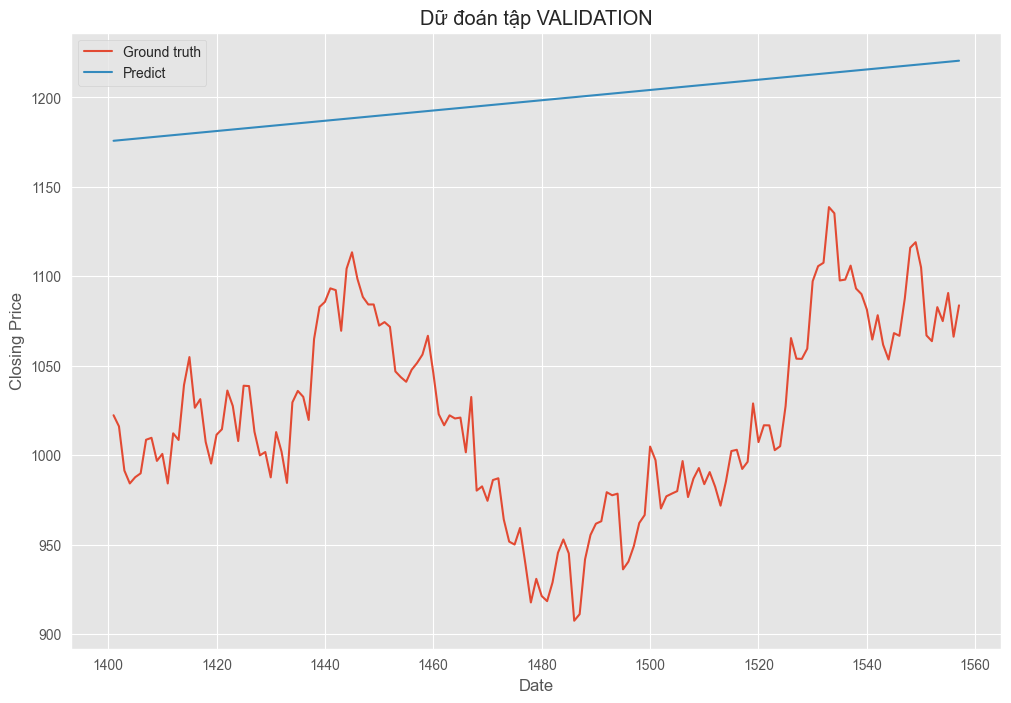

RMSE: 183.93
MAPE: 17.59%
MAE: 176.70


In [12]:
# 12. Quá trình Validate
x_val= np.array(val_data_df.index).reshape(-1, 1)
y_val = np.array(val_data_df)
val_predict =  model.predict(x_val)
visualize(val_data_df, val_predict, 'Dữ đoán tập VALIDATION')
deviation(val_data_df, val_predict)

In [13]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[[1220.77420544]
 [1221.06094553]
 [1221.34768563]
 [1221.63442572]
 [1221.92116582]
 [1222.20790591]
 [1222.49464601]
 [1222.7813861 ]
 [1223.0681262 ]
 [1223.35486629]
 [1223.64160639]
 [1223.92834648]
 [1224.21508658]
 [1224.50182667]
 [1224.78856677]
 [1225.07530686]
 [1225.36204696]
 [1225.64878705]
 [1225.93552715]
 [1226.22226724]
 [1226.50900734]
 [1226.79574743]
 [1227.08248753]
 [1227.36922762]
 [1227.65596772]
 [1227.94270781]
 [1228.22944791]
 [1228.516188  ]
 [1228.8029281 ]
 [1229.08966819]]


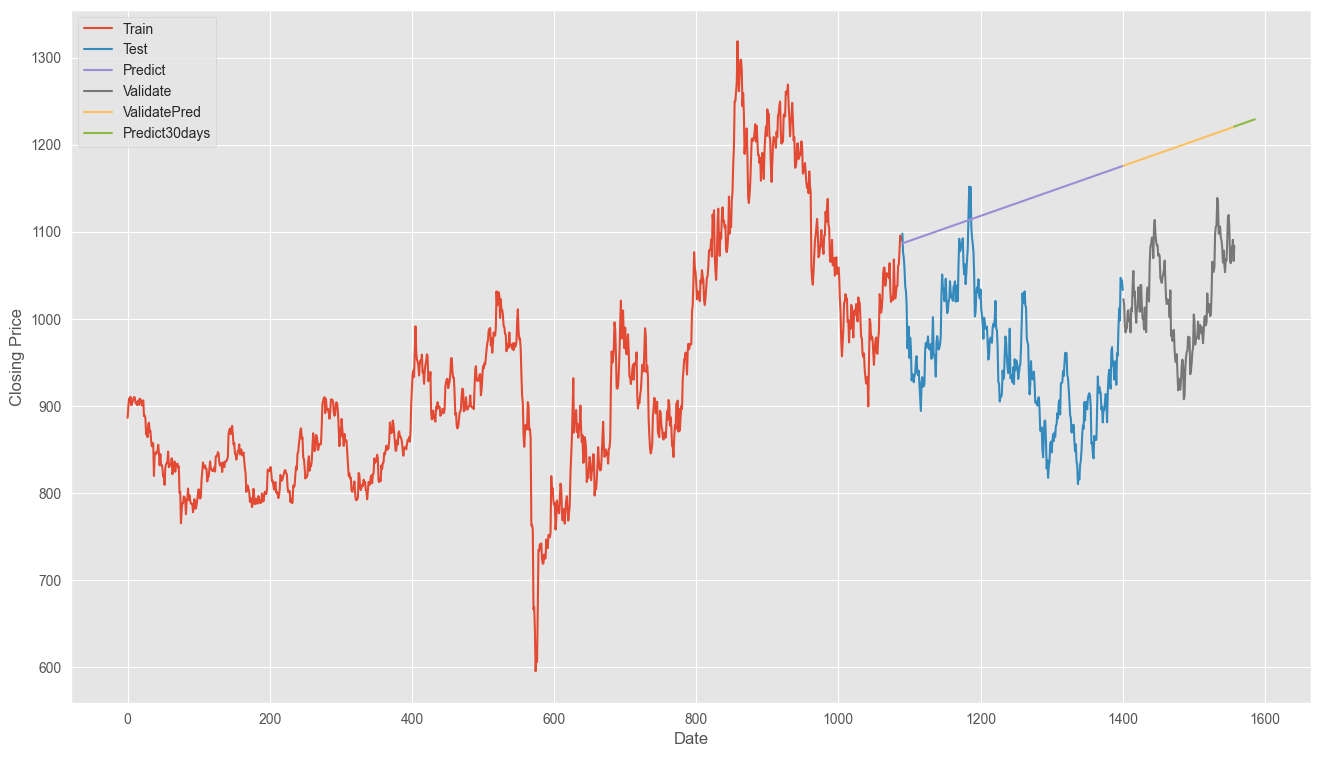

In [14]:
#Visualization
plt.figure(figsize=(16,9))
#train label
plt.plot(train_data_df, label = 'Train')

#test label and predict value
plt.plot(test_data_df, label = 'Test')
plt.plot(test_data_df.index, test_predict, label='Predict')

#val label and predict value
plt.plot(val_data_df, label = 'Validate')
plt.plot(val_data_df.index, val_predict, label='ValidatePred')

#predict next 30 days value
plt.plot(last_data,y_next_30_days, label = 'Predict30days')


# plt.title(model_name)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()